**Mission of the Term Project**

Astronauts traveling to deep space will be exposed to galactic cosmic radiation (GCR), which has the potential to negatively impact their cognitive functions. Understanding these effects is crucial for ensuring astronaut safety on their missions. To investigate this, our project will analyze the biological responses of mice that have been exposed to a simulated form of space radiation. By analyzing their biological data, we aim to determine whether radiation exposure can lead to cognitive impairments.

The goal of our project is to apply and compare different machine learning algorithms, including decision trees, random forests, and single-layer perceptrons, to predict how GCR affects cognitive strength in mice. Using biological information collected from the mice, we will train models to classify whether an individual mouse is likely to experience cognitive deficits due to radiation exposure. Through this approach, we aim to assess the effectiveness and accuracy of these models in identifying potential risks, which could ultimately contribute to better predictive tools for studying space radiation effects in humans.


Methods

In [1]:
# install and import the python module for importing a notebook
!pip install import_ipynb
import import_ipynb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.0 MB/s eta 0:00:00


In [2]:
# mount your google drive to this notebook
from google.colab import drive
drive.flush_and_unmount()
drive.mount("mnt", force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at mnt


In [3]:
# import the "Copy of methods.ipynb" from your google drive into this notebook
m = __import__("mnt/MyDrive/Spring '25/CS 123A - BIOINFORMATICS/Colab Notebooks/Term Project Methods")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 193.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 143.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 181.0 MB/s eta 0:00:00
  Created wheel for pybiomart: filename=pybiomart-0.1-py3-none-any.whl size=14600 sha256=302800b2997d56d6f5d1412cb530c4f8bf322e67cea4a8d9b91865d6b496e49a
  Stored in directory: /tmp/pip-ephem-wheel-cache-xdilzxxj/wheels/ad/45/4

Data

In [4]:
# define dictionaries for data and metadata
data=dict()
metadata=dict()

In [5]:
# read in metadata
metadata['777'] = m.read_meta_data('777')

In [6]:
# read in flow cytometry assay using microglia transformed data from OSD-777
data['flow_cyto_microglia'] = m.read_phenotype_data('777', 'LSDS-125_Flow_Cytometry_Krukowski2021_Microglia_FlowCytometry_TRANSFORMED')
print('num samples: ', str(len(list(data['flow_cyto_microglia']['Sample Name']))))
print('samples: ', list(data['flow_cyto_microglia']['Sample Name']))
data['flow_cyto_microglia'].head()

num samples:  50
samples:  ['267_Microglia_12months', '268_Microglia_12months', '269_Microglia_12months', '270_Microglia_12months', '271_Microglia_12months', '272_Microglia_12months', '273_Microglia_12months', '274_Microglia_12months', '277_Microglia_12months', '279_Microglia_12months', '280_Microglia_12months', '281_Microglia_12months', '282_Microglia_12months', '283_Microglia_12months', '3_Microglia_14months', '4_Microglia_14months', '5_Microglia_14months', '6_Microglia_14months', '8_Microglia_14months', '9_Microglia_14months', '11_Microglia_14months', '35_Microglia_14months', '36_Microglia_14months', '37_Microglia_14months', '41_Microglia_14months', '43_Microglia_14months', '44_Microglia_14months', '45_Microglia_14months', '48_Microglia_14months', '66_Microglia_14months', '67_Microglia_14months', '69_Microglia_14months', '70_Microglia_14months', '71_Microglia_14months', '72_Microglia_14months', '74_Microglia_14months', '75_Microglia_14months', '82_Microglia_14months', '83_Microglia_

,Sample Name,Number_of_Microglia_CD68_Positive,Number_of_Microglia_CD107a_Positive,Number_of_Microglia_C5ar1_Positive,Number_of_Microglia_Total,Mean_Fluorescent_Intensity_of_CD11b_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_Average,Mean_Fluorescent_Intensity_of_CD11b_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD45_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_Average,Mean_Fluorescent_Intensity_of_CD45_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD68_in_Microglial_Population,Mean_Fluorescent_Intensity_of_CD107a_in_Microglial_Population,Mean_Fluorescent_Intensity_of_C5aR1_in_Microglial_Population
0,267_Microglia_12months,7435,6566,4017,18018,2506,2538,1941,2328.333333,1.093114,2104,2687,2568,2453.000000,1.185692,1.221248,1.246285,1.027902
1,268_Microglia_12months,8131,7783,5121,21035,2519,2496,1891,2302.000000,1.080751,2131,2681,2549,2453.666667,1.186015,1.155910,1.229583,1.018257
2,269_Microglia_12months,6903,7453,946,15302,2594,2623,1881,2366.000000,1.005667,2372,3592,4466,3476.666667,1.135733,1.198488,1.326134,1.074874
3,270_Microglia_12months,8281,9084,1172,18537,2844,2766,1987,2532.333333,1.076367,2393,3463,4023,3293.000000,1.075734,1.291115,1.152430,1.140136
4,271_Microglia_12months,6047,6188,3540,15775,2640,2585,2009,2411.333333,1.132081,2080,2568,2560,2402.666667,1.161363,1.010359,0.897178,1.217706


In [7]:
data['flow_cyto_microglia'].describe()

,Number_of_Microglia_CD68_Positive,Number_of_Microglia_CD107a_Positive,Number_of_Microglia_C5ar1_Positive,Number_of_Microglia_Total,Mean_Fluorescent_Intensity_of_CD11b_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_Average,Mean_Fluorescent_Intensity_of_CD11b_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD45_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD45_Average,Mean_Fluorescent_Intensity_of_CD45_Standardized_to_Sham,Mean_Fluorescent_Intensity_of_CD68_in_Microglial_Population,Mean_Fluorescent_Intensity_of_CD107a_in_Microglial_Population,Mean_Fluorescent_Intensity_of_C5aR1_in_Microglial_Population
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6293.140000,6806.320000,2801.980000,15901.440000,1873.120000,2125.440000,1432.140000,1810.233333,1.017665,957.480000,1417.300000,1499.520000,1291.433333,1.021925,1.062530,1.053825,1.028900
std,1857.907469,2058.041505,1207.915349,3443.231474,494.552638,311.250222,367.501826,376.111036,0.038729,743.506426,976.787764,1309.784236,989.390979,0.062826,0.095095,0.123392,0.082913
min,3510.000000,3867.000000,779.000000,9750.000000,1319.000000,1788.000000,829.000000,1386.666667,0.950694,245.000000,567.000000,347.000000,451.666667,0.917080,0.928544,0.805229,0.826452
25%,4758.000000,5181.250000,1974.250000,12654.750000,1504.250000,1878.750000,1229.000000,1521.083333,0.993689,445.250000,780.750000,425.000000,697.416667,0.977765,1.010371,0.979053,0.982313
50%,5994.000000,6665.500000,2726.500000,16241.500000,1627.500000,1956.000000,1356.000000,1570.666667,1.006235,504.500000,918.000000,1130.500000,824.166667,1.017532,1.035420,1.046486,1.018010
75%,7599.750000,7955.750000,3653.250000,18407.250000,2358.750000,2395.000000,1728.500000,2142.000000,1.032448,1809.250000,2278.000000,2189.000000,2092.083333,1.040609,1.103942,1.124978,1.084557
max,10702.000000,13896.000000,5638.000000,22248.000000,2887.000000,2766.000000,2020.000000,2534.666667,1.132081,2426.000000,3592.000000,4466.000000,3476.666667,1.186015,1.370044,1.484061,1.217706


In [8]:
df = data['flow_cyto_microglia']

# Create a new column to indicate timepoint
df['Timepoint'] = df['Sample Name'].apply(lambda x: '12months' if '12months' in x else '14months')

In [9]:
numeric_cols = df.select_dtypes(include='number').columns
significant_results = {}

for field in numeric_cols:
    value_dict = {
        '12months': df[df['Timepoint'] == '12months'][field].tolist(),
        '14months': df[df['Timepoint'] == '14months'][field].tolist()
    }

    if len(value_dict['12months']) != 0 and len(value_dict['14months']) != 0:
        p_val = m.stats.ttest_ind(value_dict['12months'], value_dict['14months'], equal_var=False).pvalue
        if p_val < 0.05:
            significant_results[field] = {'t-test p-value': float('%.5f' % p_val)}

# View only significant results
from pprint import pprint
pprint(significant_results)

{'Mean_Fluorescent_Intensity_of_CD11b_Average': {'t-test p-value': 0.0},
 'Mean_Fluorescent_Intensity_of_CD11b_Standardized_to_Sham': {'t-test p-value': 0.04451},
 'Mean_Fluorescent_Intensity_of_CD11b_in_C5aR1_Positive_Cells': {'t-test p-value': 0.0},
 'Mean_Fluorescent_Intensity_of_CD11b_in_CD107a_Positive_Cells': {'t-test p-value': 0.0},
 'Mean_Fluorescent_Intensity_of_CD11b_in_CD68_Positive_Cells': {'t-test p-value': 0.0},
 'Mean_Fluorescent_Intensity_of_CD45_Average': {'t-test p-value': 0.0},
 'Mean_Fluorescent_Intensity_of_CD45_Standardized_to_Sham': {'t-test p-value': 0.02002},
 'Mean_Fluorescent_Intensity_of_CD45_in_C5aR1_Positive_Cells': {'t-test p-value': 0.0},
 'Mean_Fluorescent_Intensity_of_CD45_in_CD107a_Positive_Cells': {'t-test p-value': 0.0},
 'Mean_Fluorescent_Intensity_of_CD45_in_CD68_Positive_Cells': {'t-test p-value': 0.0},
 'Number_of_Microglia_CD107a_Positive': {'t-test p-value': 0.00157},
 'Number_of_Microglia_CD68_Positive': {'t-test p-value': 0.0},
 'Number_of_M

In [10]:
def plotbox_and_stats_timepoint(data_, sample_key, field, exclude_samples=[]):
    print('Field:', field)
    print('Excluding samples:', exclude_samples)

    # Initialize dictionaries to hold values for each timepoint
    value_dict = {'12months': [], '14months': []}
    results = {}

    # Populate the value_dict by examining each sample name
    for i in range(len(data_)):
        sample_name = data_.iloc[i][sample_key]
        if sample_name in exclude_samples:
            continue
        if '12months' in sample_name:
            value_dict['12months'].append(data_.iloc[i][field])
        elif '14months' in sample_name:
            value_dict['14months'].append(data_.iloc[i][field])

    # Perform t-test if both groups have data
    if len(value_dict['12months']) != 0 and len(value_dict['14months']) != 0:
        pvalue = m.stats.ttest_ind(value_dict['12months'], value_dict['14months'], equal_var=False).pvalue
        results[field] = {'t-test p-value': float('%.5f' % pvalue)}

    # Print out results and the number of samples in each group
    print("Results:", results)
    print("n 12months =", len(value_dict['12months']))
    print("n 14months =", len(value_dict['14months']))

    # Plotting the boxplot for the two groups
    fig, ax = m.plt.subplots()
    ax.boxplot(list(value_dict.values()))
    ax.set_xticklabels(list(value_dict.keys()))
    m.plt.xticks(rotation=30, ha='right')
    m.plt.title(f"{field}\n")
    m.plt.ylabel("Value")
    m.plt.tight_layout()
    m.plt.show()

Field: Number_of_Microglia_CD107a_Positive
Excluding samples: []
Results: {'Number_of_Microglia_CD107a_Positive': {'t-test p-value': 0.00157}}
n 12months = 14
n 14months = 36


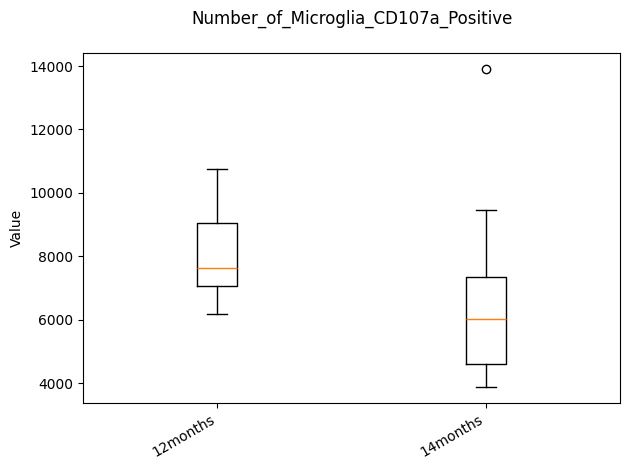

Field: Number_of_Microglia_CD68_Positive
Excluding samples: []
Results: {'Number_of_Microglia_CD68_Positive': {'t-test p-value': 0.0}}
n 12months = 14
n 14months = 36


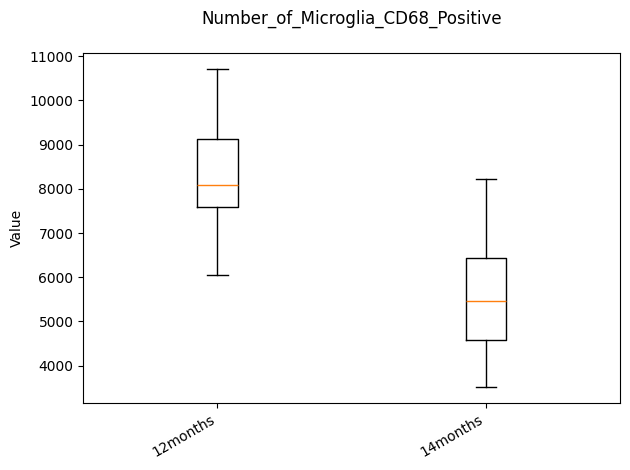

Field: Number_of_Microglia_Total
Excluding samples: []
Results: {'Number_of_Microglia_Total': {'t-test p-value': 0.0}}
n 12months = 14
n 14months = 36


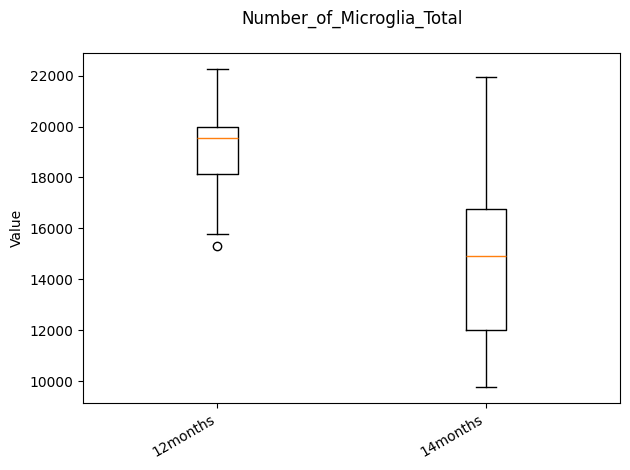

In [11]:
microglia_data = {'Number_of_Microglia_CD107a_Positive', 'Number_of_Microglia_CD68_Positive', 'Number_of_Microglia_Total'}

for field in microglia_data:
    plotbox_and_stats_timepoint(
        data_ = data['flow_cyto_microglia'],
        sample_key = 'Sample Name',
        field = field
    )

In [12]:
df_meta = metadata['777']

In [13]:
df['Source Number'] = df['Sample Name'].str.extract(r'^(\d+)')

df_meta['Source Number'] = df_meta['Sample Name'].str.extract(r'^(\d+)')

merged_data = m.pd.merge(df, df_meta, on='Source Number', suffixes=('_flow', '_meta'))

merged_data = merged_data.drop_duplicates(subset='Sample Name_flow')

merged_data.head()

,Sample Name_flow,Number_of_Microglia_CD68_Positive,Number_of_Microglia_CD107a_Positive,Number_of_Microglia_C5ar1_Positive,Number_of_Microglia_Total,Mean_Fluorescent_Intensity_of_CD11b_in_CD68_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_in_CD107a_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_in_C5aR1_Positive_Cells,Mean_Fluorescent_Intensity_of_CD11b_Average,Mean_Fluorescent_Intensity_of_CD11b_Standardized_to_Sham,...,Term Source REF.19,Term Accession Number.19,Parameter Value[ionizing radiation device],Term Source REF.20,Term Accession Number.20,Comment[NSRL Run],Protocol REF.2,Parameter Value[Sample Preservation Method],Term Source REF.21,Term Accession Number.21
0,267_Microglia_12months,7435,6566,4017,18018,2506,2538,1941,2328.333333,1.093114,...,RBO,http://purl.obolibrary.org/obo/RBO_00000121,NASA Space Radiation Laboratory,RBO,http://purl.obolibrary.org/obo/RBO_00000030,19C,sample collection,Fresh,OSD,https://osdr.nasa.gov/
1,268_Microglia_12months,8131,7783,5121,21035,2519,2496,1891,2302.000000,1.080751,...,RBO,http://purl.obolibrary.org/obo/RBO_00000121,NASA Space Radiation Laboratory,RBO,http://purl.obolibrary.org/obo/RBO_00000030,19C,sample collection,Fresh,OSD,https://osdr.nasa.gov/
2,269_Microglia_12months,6903,7453,946,15302,2594,2623,1881,2366.000000,1.005667,...,RBO,http://purl.obolibrary.org/obo/RBO_00000121,NASA Space Radiation Laboratory,RBO,http://purl.obolibrary.org/obo/RBO_00000030,19C,sample collection,Fresh,OSD,https://osdr.nasa.gov/
3,270_Microglia_12months,8281,9084,1172,18537,2844,2766,1987,2532.333333,1.076367,...,RBO,http://purl.obolibrary.org/obo/RBO_00000121,NASA Space Radiation Laboratory,RBO,http://purl.obolibrary.org/obo/RBO_00000030,19C,sample collection,Fresh,OSD,https://osdr.nasa.gov/
4,271_Microglia_12months,6047,6188,3540,15775,2640,2585,2009,2411.333333,1.132081,...,RBO,http://purl.obolibrary.org/obo/RBO_00000121,NASA Space Radiation Laboratory,RBO,http://purl.obolibrary.org/obo/RBO_00000030,19C,sample collection,Fresh,OSD,https://osdr.nasa.gov/


In [14]:
male_data = merged_data[merged_data['Factor Value[Sex]'] == 'Male']
female_data = merged_data[merged_data['Factor Value[Sex]'] == 'Female']

print("Male samples:", male_data.shape[0])
print("Female samples:", female_data.shape[0])

Male samples: 35
Female samples: 15


In [15]:
# Calculate average microglia counts for each marker
male_avg = {
    'CD107a': male_data['Number_of_Microglia_CD107a_Positive'].mean(),
    'CD68': male_data['Number_of_Microglia_CD68_Positive'].mean(),
    'Total': male_data['Number_of_Microglia_Total'].mean()
}

female_avg = {
    'CD107a': female_data['Number_of_Microglia_CD107a_Positive'].mean(),
    'CD68': female_data['Number_of_Microglia_CD68_Positive'].mean(),
    'Total': female_data['Number_of_Microglia_Total'].mean()
}

# Label data: cognitive decline if *any* of the counts are above average (you can adjust this logic as needed)
male_data['male_cognitive_decline'] = (
    (male_data['Number_of_Microglia_CD107a_Positive'] > male_avg['CD107a']) |
    (male_data['Number_of_Microglia_CD68_Positive'] > male_avg['CD68']) |
    (male_data['Number_of_Microglia_Total'] > male_avg['Total'])
).astype(int)

female_data['female_cognitive_decline'] = (
    (female_data['Number_of_Microglia_CD107a_Positive'] > female_avg['CD107a']) |
    (female_data['Number_of_Microglia_CD68_Positive'] > female_avg['CD68']) |
    (female_data['Number_of_Microglia_Total'] > female_avg['Total'])
).astype(int)

# Features and target
features = ['Number_of_Microglia_CD107a_Positive', 'Number_of_Microglia_CD68_Positive', 'Number_of_Microglia_Total']

XM = male_data[features]
yM = male_data['male_cognitive_decline']

XF = female_data[features]
yF = female_data['female_cognitive_decline']

# Train-test split
from sklearn.model_selection import train_test_split
XM_train, XM_test, yM_train, yM_test = train_test_split(XM, yM, test_size=0.2, random_state=42)
XF_train, XF_test, yF_train, yF_test = train_test_split(XF, yF, test_size=0.2, random_state=42)

In [16]:
print('X train: ', XM_train.shape)
print('y train: ', len(yM_train))
print('X test: ', XM_test.shape)
print('y test: ', len(yM_test))

X train:  (28, 3)
y train:  28
X test:  (7, 3)
y test:  7


In [17]:
from sklearn.metrics import classification_report, accuracy_score

# Model
lr_clf = m.LogisticRegression()

# Male Model
lr_clf.fit(XM_train, yM_train)

# Training accuracy
yM_lr_train_pred = lr_clf.predict(XM_train)
lr_train_acc_M = accuracy_score(yM_train, yM_lr_train_pred)
print("Male - Training Accuracy:", lr_train_acc_M)

# Testing accuracy
yM_lr_test_pred = lr_clf.predict(XM_test)
lr_test_acc_M = accuracy_score(yM_test, yM_lr_test_pred)
print("Male - Testing Accuracy:", lr_test_acc_M)

print("Male Model Results:")
print(classification_report(yM_test, yM_lr_test_pred))

# Female Model
lr_clf.fit(XF_train, yF_train)

# Training accuracy
yF_lr_train_pred = lr_clf.predict(XF_train)
lr_train_acc_F = accuracy_score(yF_train, yF_lr_train_pred)
print("Female - Training Accuracy:", lr_train_acc_F)

# Testing accuracy
yF_lr_test_pred = lr_clf.predict(XF_test)
lr_test_acc_F = accuracy_score(yF_test, yF_lr_test_pred)
print("Female - Testing Accuracy:", lr_test_acc_F)

print("Female Model Results:")
print(classification_report(yF_test, yF_lr_test_pred))

Male - Training Accuracy: 1.0
Male - Testing Accuracy: 0.8571428571428571
Male Model Results:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.75      0.86         4

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7

Female - Training Accuracy: 1.0
Female - Testing Accuracy: 0.6666666666666666
Female Model Results:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [18]:
# Model: Random Forest
max_depth = 2
rf_clf = m.RandomForestClassifier(max_depth=max_depth, random_state=23)

# Male Model
rf_clf.fit(XM_train, yM_train)

# Training accuracy
yM_train_pred = rf_clf.predict(XM_train)
train_acc_M = accuracy_score(yM_train, yM_train_pred)
print("Male - Training Accuracy:", train_acc_M)

# Testing accuracy
yM_test_pred = rf_clf.predict(XM_test)
test_acc_M = accuracy_score(yM_test, yM_test_pred)
print("Male - Testing Accuracy:", test_acc_M)

print("Male Model Results:")
print(classification_report(yM_test, yM_test_pred))

# Female Model
rf_clf.fit(XF_train, yF_train)

# Training accuracy
yF_train_pred = rf_clf.predict(XF_train)
train_acc_F = accuracy_score(yF_train, yF_train_pred)
print("Female - Training Accuracy:", train_acc_F)

# Testing accuracy
yF_test_pred = rf_clf.predict(XF_test)
test_acc_F = accuracy_score(yF_test, yF_test_pred)
print("Female - Testing Accuracy:", test_acc_F)

print("Female Model Results:")
print(classification_report(yF_test, yF_test_pred))

Male - Training Accuracy: 1.0
Male - Testing Accuracy: 1.0
Male Model Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Female - Training Accuracy: 1.0
Female - Testing Accuracy: 0.6666666666666666
Female Model Results:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



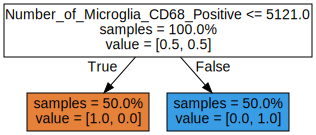

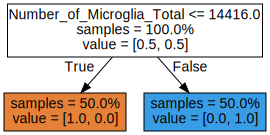

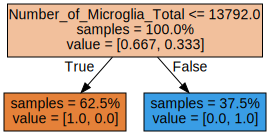

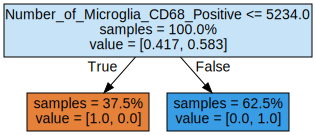

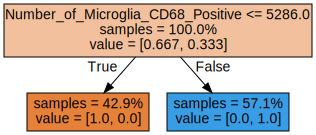

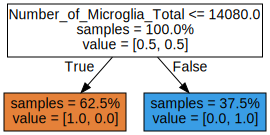

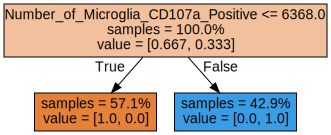

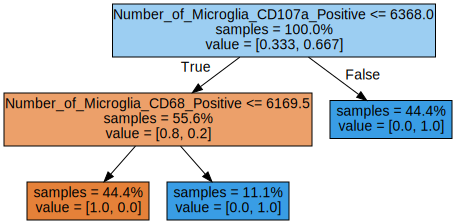

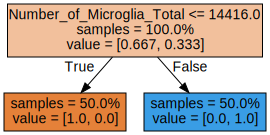

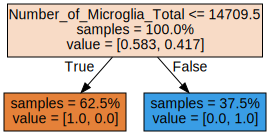

In [19]:
# visualize forest / feature importance
num_trees=10
for i in range(num_trees):
    tree = rf_clf.estimators_[i]
    dot_data = m.export_graphviz(tree,
                               feature_names=XM_train.columns,
                               filled=True,
                               impurity=False,
                               proportion=True)
    graph = m.graphviz.Source(dot_data)
    display(graph)

In [20]:
# Male Model
slp_clf = m.Perceptron(tol=1e-3, random_state=0)
slp_clf.fit(XM_train, yM_train)

# Training accuracy
yM_train_pred = slp_clf.predict(XM_train)
train_acc_M = accuracy_score(yM_train, yM_train_pred)
print("Male - Training Accuracy:", train_acc_M)

# Testing accuracy
yM_test_pred = slp_clf.predict(XM_test)
test_acc_M = accuracy_score(yM_test, yM_test_pred)
print("Male - Testing Accuracy:", test_acc_M)

# Classification report
print("Male Model Results:")
print(classification_report(yM_test, yM_test_pred))

# Female Model
slp_clf.fit(XF_train, yF_train)

# Training accuracy
yF_train_pred = slp_clf.predict(XF_train)
train_acc_F = accuracy_score(yF_train, yF_train_pred)
print("Female - Training Accuracy:", train_acc_F)

# Testing accuracy
yF_test_pred = slp_clf.predict(XF_test)
test_acc_F = accuracy_score(yF_test, yF_test_pred)
print("Female - Testing Accuracy:", test_acc_F)

# Classification report
print("Female Model Results:")
print(classification_report(yF_test, yF_test_pred))

Male - Training Accuracy: 0.7142857142857143
Male - Testing Accuracy: 0.7142857142857143
Male Model Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         4

    accuracy                           0.71         7
   macro avg       0.83      0.67      0.65         7
weighted avg       0.81      0.71      0.67         7

Female - Training Accuracy: 0.5
Female - Testing Accuracy: 0.3333333333333333
Female Model Results:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



Logistic Regression Model Training Accuracy: <b> 100% </b>
<br> Logistic Regression Model Testing Accuracy: <b> 86% </b>

Random Forest Model Training Accuracy: <b> 100% </b>
<br>Random Forest Model Testing Accuracy: <b> 100% </b>

Single Layer Perceptron Model Training Accuracy: <b> 71% </b>
<br>Single Layer Perceptron Model Testing Accuracy: <b> 71% </b>